Quick Stats
Return % of Companies with Market Cap > $2 billion, Share Price > $5
Sample Size:  149260

Probability Return > 0%:  0.5122671847782393
Probability Return < 0%:  0.4877328152217607

Probability Return > 5%:  0.17882888918665416
Probability Return < -5%:  0.14766849792308723

Probability -0.3% < Return < -0.2%:  0.00881012997454107
Probability -0.2% < Return < -0.1%:  0.007537183438295592
Probability -0.1% < Return < 0%:  0.005560766447809192
Probability Return = 0%:  0.023402117111081335
Probability 0% < Return < 0.1%:  0.005386573763901916
Probability 0.1% < Return < 0.2%:  0.007785073026932869
Probability 0.2% < Return < 0.3%:  0.008877127160659252

Probability -0.01% < Return < 0.01%:  0.023583009513600428
Probability -0.001% < Return < 0.001%:  0.023408816829693153
Probability Return = 0%:  0.023402117111081335

Median:  0.1882648304889192
Mean:  1.0126347858872928
Standard Deviation:  169.18206227862203
Variance:  28622.57019684754
Skewness:  368.75444156064873

Maximu

Text(0.5, 0, 'Earnings Pop Return (%) | BINS = 250 | SUPPORT on [-2,2]')

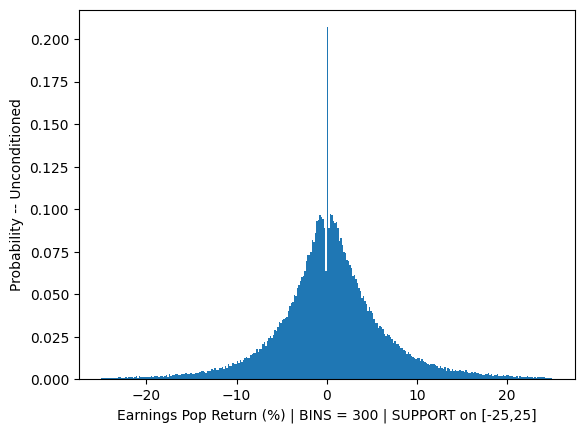

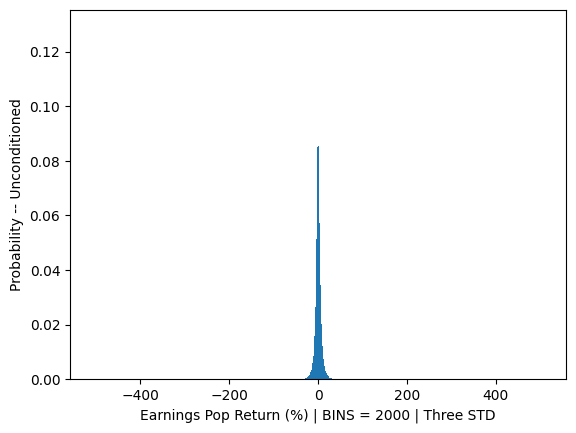

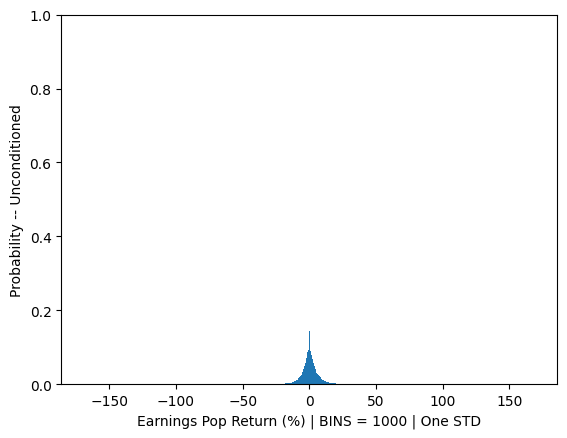

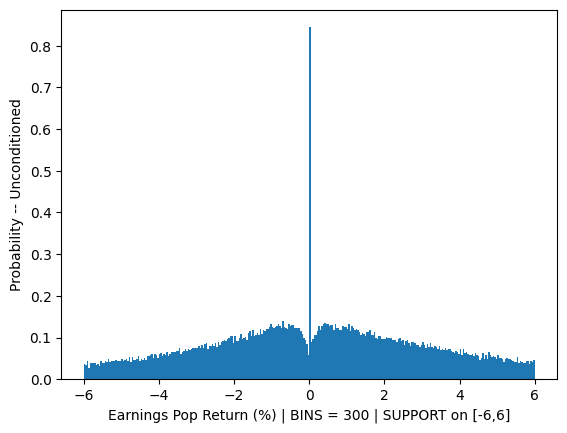

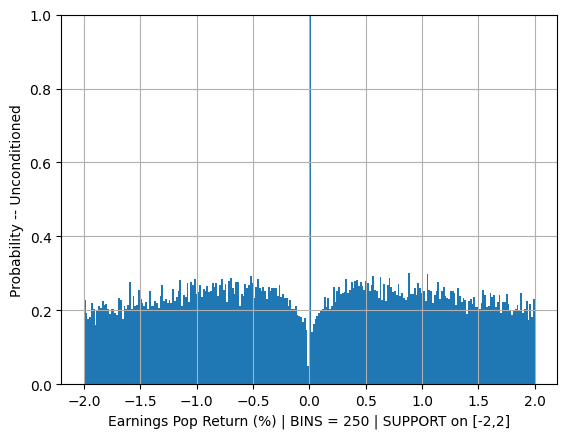

In [6]:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt

# read return data from csv

# 'returns_analyst_count.csv'

data = pd.read_csv('returns_unconditioned.csv').to_numpy()
data = data.flatten('C')

f_a = -100
f_b = 100
N = len(data)
filter = False

# Constrict sample space to specified interval
if filter:
    data = data[(data > f_a) & (data < f_b)]

# Compute probability that return is greater than zero
def prob_monte_carlo(data,order,*args):
    """Computes Monte Carlo Probability based on input data and model parameters."""
    
    p_sum = 0
    N = len(data)
    
    if order not in ['gt','lt','e','n']:
        raise Exception("Value Error: input for 'order is invalid.")
    
    
    if len(args) == 1:
        
        if order == 'gt':
            for i in range(N):
                ret_i = data[i]
                if ret_i > args:
                    p_sum = p_sum + 1
        
        elif order == 'lt':
            for i in range(N):
                ret_i = data[i]
                if ret_i < args:
                    p_sum = p_sum + 1
                    
        elif order == 'e':
            for i in range(N):
                ret_i = data[i]
                if ret_i == args:
                    p_sum = p_sum + 1
                                
        return p_sum / N
    
    elif len(args) == 2:
        for i in range(N):
            ret_i = data[i]
            if ret_i > args[0] and ret_i < args[1]:
                p_sum = p_sum + 1
            
        return p_sum / N
    
    else:
        raise Exception("Invalid Input: no more than two parameters allowed.")

# compute relevant probabilities                
prob_greater_0 = prob_monte_carlo(data,'gt',0)
prob_greater_5 = prob_monte_carlo(data,'gt',5)        
prob_less_neg5 = prob_monte_carlo(data,'lt',-5)

prob_under_neg0p2 = prob_monte_carlo(data,'n',-0.3,-0.2)
prob_under_neg0p1 = prob_monte_carlo(data,'n',-0.2,-0.1)
prob_under_zero = prob_monte_carlo(data,'n',-0.1,0)

prob_zero = prob_monte_carlo(data,'e',0)

prob_over_zero = prob_monte_carlo(data,'n',0,0.1)
prob_over_pos0p1 = prob_monte_carlo(data,'n',0.1,0.2)
prob_over_pos0p2 = prob_monte_carlo(data,'n',0.2,0.3)

prob_near_zero = prob_monte_carlo(data,'n',-0.01,0.01)
prob_near_zero2 = prob_monte_carlo(data,'n',-0.001,0.001)


print("Quick Stats\n============================")
print("Return % of Companies with Market Cap > $2 billion, Share Price > $5")
print("Sample Size: ",N)
if filter:
    print("NOTE: Sample Space constricted to returns in [{},{}].".format(f_a,f_b))
print()
print("Probability Return > 0%: ",prob_greater_0)
print("Probability Return < 0%: ",1 - prob_greater_0)
print()
print("Probability Return > 5%: ",prob_greater_5)
print("Probability Return < -5%: ",prob_less_neg5)
print()
print("Probability {}% < Return < {}%: ".format(-0.3,-0.2),prob_under_neg0p2)
print("Probability {}% < Return < {}%: ".format(-0.2,-0.1),prob_under_neg0p1)
print("Probability {}% < Return < {}%: ".format(-0.1,0),prob_under_zero)
print("Probability Return = 0%: ",prob_zero)
print("Probability {}% < Return < {}%: ".format(0,0.1),prob_over_zero)
print("Probability {}% < Return < {}%: ".format(0.1,0.2),prob_over_pos0p1)
print("Probability {}% < Return < {}%: ".format(0.2,0.3),prob_over_pos0p2)
print()
print("Probability {}% < Return < {}%: ".format(-0.01,0.01),prob_near_zero)
print("Probability {}% < Return < {}%: ".format(-0.001,0.001),prob_near_zero2)
print("Probability Return = 0%: ",prob_zero)
print()
print("Median: ", np.median(data))
print("Mean: ",np.mean(data))
print("Standard Deviation: ",np.std(data))
print("Variance: ",np.std(data) ** 2)
print("Skewness: ",st.skew(data))
print()
print("Maximum: ",data.max())
print("Minimum: ",data.min())
print("25th Percentile: ",np.percentile(data,25))
print("75th Percentile: ",np.percentile(data,75))
print("Interquartile Range: ",np.percentile(data,75)-np.percentile(data,25))
print()

plt.figure(0)
BINS = 300
plt.hist(data,range=[-25,25],density=True,bins=BINS)
plt.ylabel('Probability -- Unconditioned')
plt.xlabel("Earnings Pop Return (%) | BINS = {} | SUPPORT on [-25,25]".format(BINS))

plt.figure(1)
BINS = 2000
plt.hist(data,range=[-3*np.std(data),3*np.std(data)],density=True,bins=BINS)
plt.ylabel('Probability -- Unconditioned')
plt.xlabel("Earnings Pop Return (%) | BINS = {} | Three STD".format(BINS))

plt.figure(2)
BINS = 1000
plt.hist(data,range=[-np.std(data),np.std(data)],density=True,bins=BINS)
plt.ylim(0,1)
plt.ylabel('Probability -- Unconditioned')
plt.xlabel("Earnings Pop Return (%) | BINS = {} | One STD".format(BINS))

plt.figure(3)
BINS = 300
plt.hist(data,range=[-6,6],density=True,bins=BINS)
plt.ylabel('Probability -- Unconditioned')
plt.xlabel("Earnings Pop Return (%) | BINS = {} | SUPPORT on [-6,6]".format(BINS))

plt.figure(4)
BINS = 250
plt.hist(data,range=[-2,2],density=True,bins=BINS)
plt.ylim(0,1)
plt.grid()
plt.ylabel('Probability -- Unconditioned')
plt.xlabel("Earnings Pop Return (%) | BINS = {} | SUPPORT on [-2,2]".format(BINS))
        